In [1]:
from scapy.all import *
import pandas as pd 
import numpy as np 
import binascii
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
from scapy.layers.inet import *

In [2]:
pip install WinPcapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pcap_file = "analisis_paquetes.pcap"
pcap2 = rdpcap(pcap_file)

In [4]:
amount_of_packets = 100
pcap = sniff(count = amount_of_packets)

In [5]:
print("Tipo --> ",type(pcap))
print("Largo -->", len(pcap))
print(pcap)

Tipo -->  <class 'scapy.plist.PacketList'>
Largo --> 100
<Sniffed: TCP:46 UDP:45 ICMP:1 Other:8>


In [6]:
pcap = pcap + pcap2

In [7]:
pcap

<Sniffed+analisis_paquetes.pcap: TCP:46 UDP:107 ICMP:1 Other:8>

In [8]:
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

In [9]:
dataframe_fields = ip_fields + ["time"] + tcp_fields + ['payload','payload_raw','payload_hex']

In [10]:
df = pd.DataFrame(columns = dataframe_fields)

In [11]:
for packet in pcap[IP]:
    field_values = []
    for field in ip_fields:
        if field == "options":
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    field_values.append(packet.time)
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field =="options":
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)


In [12]:
df = df.reset_index()
df = df.drop(columns="index")

In [13]:
df.head(10)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,40,102,55770,DF,0,50,17,2258,...,None,None,None,None,47014,None,None,74,b'\x00\x02\x00F\x00\x06\xbb\x0e181.174.106.11\...,b'000200460006bb0e3138312e3137342e3130362e3131...
1,4,5,0,115,20334,DF,0,128,6,25399,...,5,0,PA,513,50917,0,0,75,b'\x17\x03\x03\x00F\x85\xf6\x96\x0b\x98\n\xa0\...,b'170303004685f6960b980aa0d66c38a9d4c543756dee...
2,4,5,0,40,47726,DF,0,87,6,8578,...,5,0,A,2762,35600,0,None,6,b'\x00\x00\x00\x00\x00\x00',b'000000000000'
3,4,5,0,112,47727,DF,0,87,6,8505,...,5,0,PA,2762,52525,0,0,72,b'\x17\x03\x03\x00C>&.\x04\xf7\xee\xfb\xca1\x8...,b'17030300433e262e04f7eefbca318676fd0eed84b5fc...
4,4,5,0,80,55806,DF,0,51,17,2028,...,None,None,None,None,7860,None,None,52,"b""\x81\xc9\x00\x07\x00\x06\xbb\x0e\xa6\x11\xc0...",b'81c900070006bb0ea611c05b27f8800a54c630a83bfc...
5,4,5,0,40,20335,DF,0,128,6,25473,...,5,0,A,513,37777,0,None,0,b'',b''
6,4,5,0,36,55186,,0,128,17,64899,...,None,None,None,None,57255,None,None,8,b'\x137\xca\xfeE\x04\x00\x00',b'1337cafe45040000'
7,4,5,40,36,55851,DF,0,50,17,2243,...,None,None,None,None,57255,None,None,18,b'\x137\xca\xfeE\x04\x00\x00',b'1337cafe45040000'
8,4,5,0,80,55947,DF,0,51,17,1887,...,None,None,None,None,41025,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eB7Ye\xfezr\x...,b'81c900070006bb0e42375965fe7a72b9a1760b0b9955...
9,4,5,0,110,47728,DF,0,87,6,8506,...,5,0,PA,2762,14029,0,0,70,b'\x17\x03\x03\x00A\xb3^\xec\xb6\xe3M\x16\xac\...,b'1703030041b35eecb6e34d16ac9c0775e2832e9b98e6...


In [14]:
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,31.204.133.52,192.168.0.10,50003,54245
1,192.168.0.10,157.240.233.60,59119,443
2,157.240.233.60,192.168.0.10,443,59119
3,157.240.233.60,192.168.0.10,443,59119
4,31.204.133.52,192.168.0.10,50003,61464
...,...,...,...,...
149,84.54.22.33,10.1.10.53,53,53
150,10.1.10.53,84.54.22.33,53,53
151,84.54.22.33,10.1.10.53,53,53
152,10.1.10.53,84.54.22.33,53,53


In [15]:
frq_srcadd = df['src'].describe()['top']
print(frq_srcadd)

31.204.133.52


In [16]:
frequent_dst_address = df['dst'].describe()['top']
print(frequent_dst_address)

192.168.0.10


In [17]:
print(df[df['src'] == frq_srcadd]['dst'].unique())

['192.168.0.10']


In [18]:
print(df[df['src'] == frq_srcadd]['dport'].unique())

[54245 61464]


In [19]:
print(df[df['src'] == frq_srcadd]['sport'].unique())

[50003]


<AxesSubplot:xlabel='src'>

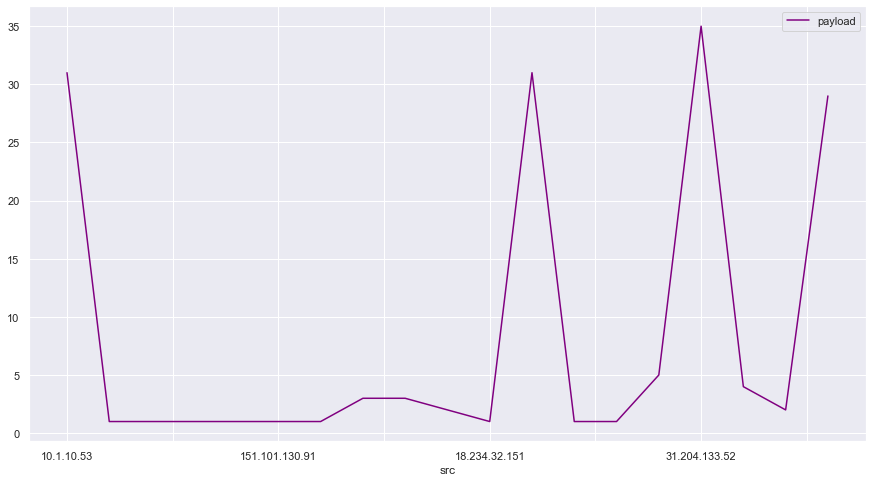

In [20]:
df.groupby('src').count()['payload'].plot(legend=True, figsize=(15, 8), color="purple")

<AxesSubplot:xlabel='dst'>

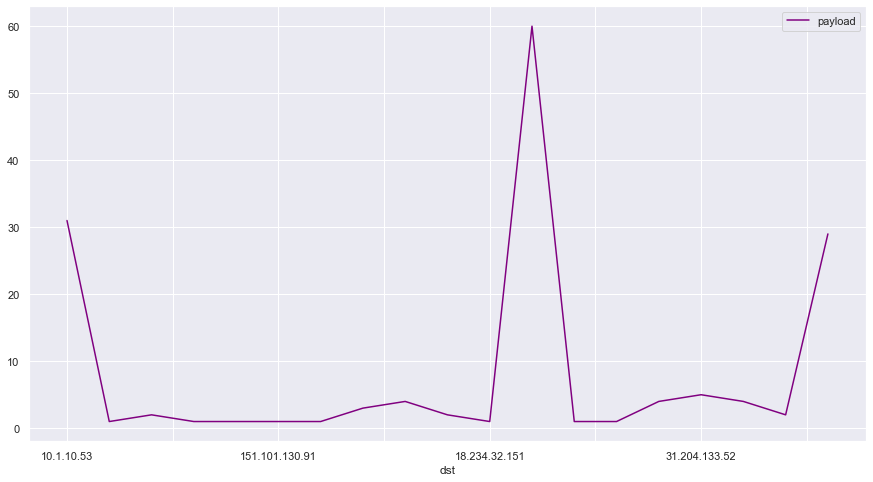

In [21]:
df.groupby('dst').count()['payload'].plot(legend=True, figsize=(15, 8),color="purple")

<AxesSubplot:xlabel='sport'>

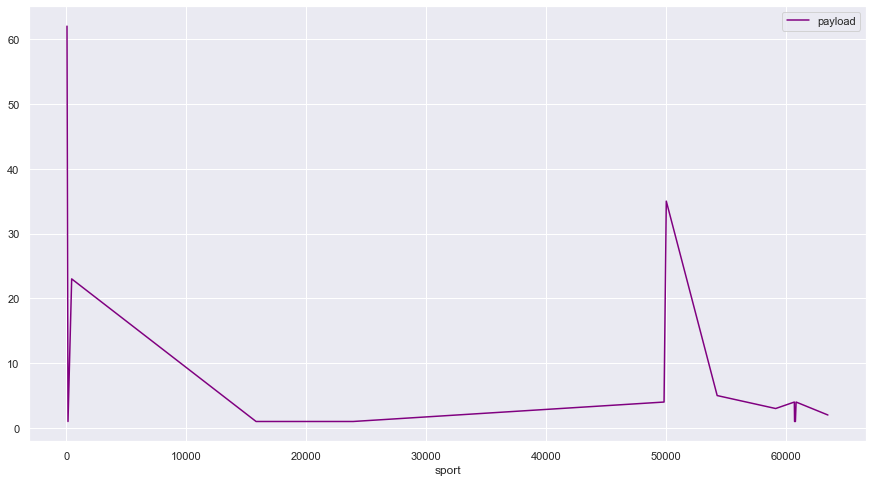

In [22]:
df.groupby('sport').count()['payload'].plot(legend=True, figsize=(15, 8),color="purple")

<AxesSubplot:xlabel='dport'>

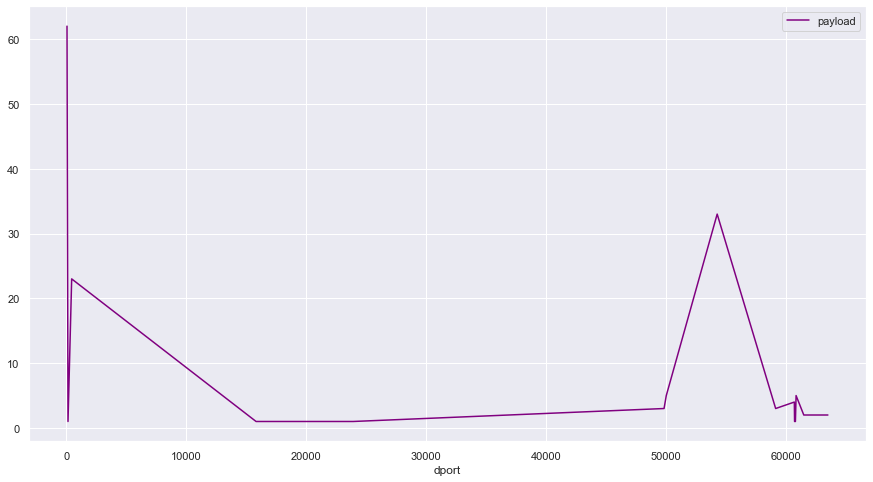

In [23]:
df.groupby('dport').count()['payload'].plot(legend=True, figsize=(15, 8),color="purple")

In [24]:
df_top = df[df['src'] == frq_srcadd]

In [25]:
df_top

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,40,102,55770,DF,0,50,17,2258,...,None,None,None,None,47014,None,None,74,b'\x00\x02\x00F\x00\x06\xbb\x0e181.174.106.11\...,b'000200460006bb0e3138312e3137342e3130362e3131...
4,4,5,0,80,55806,DF,0,51,17,2028,...,None,None,None,None,7860,None,None,52,"b""\x81\xc9\x00\x07\x00\x06\xbb\x0e\xa6\x11\xc0...",b'81c900070006bb0ea611c05b27f8800a54c630a83bfc...
7,4,5,40,36,55851,DF,0,50,17,2243,...,None,None,None,None,57255,None,None,18,b'\x137\xca\xfeE\x04\x00\x00',b'1337cafe45040000'
8,4,5,0,80,55947,DF,0,51,17,1887,...,None,None,None,None,41025,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eB7Ye\xfezr\x...,b'81c900070006bb0e42375965fe7a72b9a1760b0b9955...
12,4,5,40,80,55968,DF,0,50,17,2082,...,None,None,None,None,39561,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eo\xa4\xa2m\x...,b'81c900070006bb0e6fa4a26d98e34b5c18cbe89bfdc8...
17,4,5,40,80,56069,DF,0,50,17,1981,...,None,None,None,None,60237,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eLx2\xbc\xdfv...,b'81c900070006bb0e4c7832bcdf76a794d3fe5f734252...
18,4,5,40,113,56191,DF,0,50,17,1826,...,None,None,None,None,27082,None,None,85,b'\x90xqU\xc10\xf6\x85\x00\x06\xba\x89\xbe\xde...,b'90787155c130f6850006ba89bede000131690add3d6c...
19,4,5,40,113,56192,DF,0,50,17,1825,...,None,None,None,None,49294,None,None,85,b'\x90xqV\xc10\xfaE\x00\x06\xba\x89\xbe\xde\x0...,b'90787156c130fa450006ba89bede00013330a29d657a...
20,4,5,40,193,56195,DF,0,50,17,1742,...,None,None,None,None,47027,None,None,165,"b""\x90xqW\xc10\xfe\x05\x00\x06\xba\x89\xbe\xde...",b'90787157c130fe050006ba89bede000158b8a82b1d62...
21,4,5,40,242,56196,DF,0,50,17,1692,...,None,None,None,None,63140,None,None,214,b'\x90xqX\xc11\x01\xc5\x00\x06\xba\x89\xbe\xde...,b'90787158c13101c50006ba89bede000151a3a17a622d...


In [26]:
df_payload = df_top .groupby(by = ['payload'])

In [27]:
df_payload = df_payload[['src', 'dst', 'payload']]

In [28]:
df_payload

In [29]:
df_payload.head(6)

,src,dst,payload
0,31.204.133.52,192.168.0.10,74
4,31.204.133.52,192.168.0.10,52
7,31.204.133.52,192.168.0.10,18
8,31.204.133.52,192.168.0.10,52
12,31.204.133.52,192.168.0.10,52
17,31.204.133.52,192.168.0.10,52
18,31.204.133.52,192.168.0.10,85
19,31.204.133.52,192.168.0.10,85
20,31.204.133.52,192.168.0.10,165
21,31.204.133.52,192.168.0.10,214


In [30]:
top_talks_to = df_top['dst'].unique()
df_top['dst'].value_counts()

192.168.0.10    35
Name: dst, dtype: int64

In [31]:
top_talks_to

array(['192.168.0.10'], dtype=object)

In [32]:
suspicious = top_talks_to[0]

In [36]:
df_suss = df[(df['src'] == frq_srcadd) & (df['dst'] == suspicious)]

In [37]:
array_sus = df_suss['payload_raw'].to_numpy()

In [38]:
print('sus --> ', suspicious)

sus -->  192.168.0.10


In [39]:
df_suss

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,40,102,55770,DF,0,50,17,2258,...,None,None,None,None,47014,None,None,74,b'\x00\x02\x00F\x00\x06\xbb\x0e181.174.106.11\...,b'000200460006bb0e3138312e3137342e3130362e3131...
4,4,5,0,80,55806,DF,0,51,17,2028,...,None,None,None,None,7860,None,None,52,"b""\x81\xc9\x00\x07\x00\x06\xbb\x0e\xa6\x11\xc0...",b'81c900070006bb0ea611c05b27f8800a54c630a83bfc...
7,4,5,40,36,55851,DF,0,50,17,2243,...,None,None,None,None,57255,None,None,18,b'\x137\xca\xfeE\x04\x00\x00',b'1337cafe45040000'
8,4,5,0,80,55947,DF,0,51,17,1887,...,None,None,None,None,41025,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eB7Ye\xfezr\x...,b'81c900070006bb0e42375965fe7a72b9a1760b0b9955...
12,4,5,40,80,55968,DF,0,50,17,2082,...,None,None,None,None,39561,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eo\xa4\xa2m\x...,b'81c900070006bb0e6fa4a26d98e34b5c18cbe89bfdc8...
17,4,5,40,80,56069,DF,0,50,17,1981,...,None,None,None,None,60237,None,None,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eLx2\xbc\xdfv...,b'81c900070006bb0e4c7832bcdf76a794d3fe5f734252...
18,4,5,40,113,56191,DF,0,50,17,1826,...,None,None,None,None,27082,None,None,85,b'\x90xqU\xc10\xf6\x85\x00\x06\xba\x89\xbe\xde...,b'90787155c130f6850006ba89bede000131690add3d6c...
19,4,5,40,113,56192,DF,0,50,17,1825,...,None,None,None,None,49294,None,None,85,b'\x90xqV\xc10\xfaE\x00\x06\xba\x89\xbe\xde\x0...,b'90787156c130fa450006ba89bede00013330a29d657a...
20,4,5,40,193,56195,DF,0,50,17,1742,...,None,None,None,None,47027,None,None,165,"b""\x90xqW\xc10\xfe\x05\x00\x06\xba\x89\xbe\xde...",b'90787157c130fe050006ba89bede000158b8a82b1d62...
21,4,5,40,242,56196,DF,0,50,17,1692,...,None,None,None,None,63140,None,None,214,b'\x90xqX\xc11\x01\xc5\x00\x06\xba\x89\xbe\xde...,b'90787158c13101c50006ba89bede000151a3a17a622d...


In [40]:
print(array_sus)

[b'\x00\x02\x00F\x00\x06\xbb\x0e181.174.106.11\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00.\xff'
 b"\x81\xc9\x00\x07\x00\x06\xbb\x0e\xa6\x11\xc0['\xf8\x80\nT\xc60\xa8;\xfc:\x85\xdd$\xef9\xc5\xfe\x0f\xd0Z=s\xa9<\xc24;Y\x1a\xd1;5]r\xf3\xcb\xa4\x01\x00"
 b'\x137\xca\xfeE\x04\x00\x00'
 b'\x81\xc9\x00\x07\x00\x06\xbb\x0eB7Ye\xfezr\xb9\xa1v\x0b\x0b\x99Ui\xd8(\xc8\xec_^\xd3\xf1\xefJ\xf5w\xce\xe4g;gj\xec#\xea\xc2\x11\xe5\xa3\xcc\xa4\x01\x00'
 b'\x81\xc9\x00\x07\x00\x06\xbb\x0eo\xa4\xa2m\x98\xe3K\\\x18\xcb\xe8\x9b\xfd\xc8\xcb\x9f\xc2Q.\x83\x03\x84z\xadu\xcf\xa51\r\xbc\xf0\xcd{\xdd<\xb5\x94c\xc5\xcc\xcd\xa4\x01\x00'
 b'\x81\xc9\x00\x07\x00\x06\xbb\x0eLx2\xbc\xdfv\xa7\x94\xd3\xfe_sBR\xe2SB\x0c\x13g\xc23a\xda\xbce\x1a\x99r\xb3\x18R\x80Q]7\xf6\x17\xfd2\xce\xa4\x01\x00'
 b'\x90xqU\xc10\xf6\x85\x00\x06\xba\x89\xbe\xde\x00\x011i\n\xdd=l\xe23\x1b\xa

 b'\x81\xc9\x00\x07\x00\x06\xbb\x0ey:o\x90f*9\xa4;p\xf7\xb8\xb3\x02t\x16\xd9\xd5`\x9b\xd0\xe5\x94\xa1\x85\xda\x0cJ\x04\x0f\xc5\x0f\xd7\xdd\xa1^\xa8\\\xd34\xea\xa4\x01\x00']


In [41]:
df_suss[['payload', 'payload_raw', 'src', 'sport', 'dst', 'dport']]

,payload,payload_raw,src,sport,dst,dport
0,74,b'\x00\x02\x00F\x00\x06\xbb\x0e181.174.106.11\...,31.204.133.52,50003,192.168.0.10,54245
4,52,"b""\x81\xc9\x00\x07\x00\x06\xbb\x0e\xa6\x11\xc0...",31.204.133.52,50003,192.168.0.10,61464
7,18,b'\x137\xca\xfeE\x04\x00\x00',31.204.133.52,50003,192.168.0.10,54245
8,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eB7Ye\xfezr\x...,31.204.133.52,50003,192.168.0.10,61464
12,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eo\xa4\xa2m\x...,31.204.133.52,50003,192.168.0.10,54245
17,52,b'\x81\xc9\x00\x07\x00\x06\xbb\x0eLx2\xbc\xdfv...,31.204.133.52,50003,192.168.0.10,54245
18,85,b'\x90xqU\xc10\xf6\x85\x00\x06\xba\x89\xbe\xde...,31.204.133.52,50003,192.168.0.10,54245
19,85,b'\x90xqV\xc10\xfaE\x00\x06\xba\x89\xbe\xde\x0...,31.204.133.52,50003,192.168.0.10,54245
20,165,"b""\x90xqW\xc10\xfe\x05\x00\x06\xba\x89\xbe\xde...",31.204.133.52,50003,192.168.0.10,54245
21,214,b'\x90xqX\xc11\x01\xc5\x00\x06\xba\x89\xbe\xde...,31.204.133.52,50003,192.168.0.10,54245
